# **Introduction:**

Analyzing the Bank Marketing Dataset Using Machine Lerning Mode

# **About Dataset:**


The Bank Marketing dataset is a collection of data related to marketing campaigns conducted by a Portuguese banking institution. The dataset contains information about various features related to the bank's clients and the outcome of their marketing campaigns.

**Features:** The dataset includes a combination of client information, campaign-related data, and economic indicators. Some common features in the dataset may include:

Client attributes: age, job, marital status, education, housing, loan status, etc.
Campaign data: contact method, number of contacts, last contact day/month/year, etc.
Economic indicators: consumer price index, consumer confidence index, etc.

age: A column with numerical values that shows the customer's age
job: A column with categorical values indicating the customer's job status
Marital_status: This column, which accepts categorical values, models the customer's marital status
education: It shows the educational status of the customer in a group form
default: Indicates whether the customer has bank credit by default
housing: Whether the customer has taken a loan for housing or not
loan: Has the customer received a personal loan or not?
contact: It shows how to communicate with the customer. This column can have one of two values: cellular and telephone. It means that the bank has called the customer's mobile phone or landline
month: This category column shows the month in which the customer was last contacted
day_of_week: What day was the last contact with the customer? (Saturday, Sunday, …, Friday)
campaign: The number of calls made so far to the customer for the current campaign
p_days: The number of days that have passed since the last customer contact for the previous campaign. The number 999 means that the customer has not been contacted before
previous: Number of calls made to the customer for previous campaigns
p_outcome: The result of previous campaigns for the client
deposit: Has the person responded positively to the bank's investment campaign or not?   

# **Problem Statement:**

The financial institution aims to enhance the effectiveness of future marketing campaigns by leveraging insights from past campaign data. Specifically, the institution seeks to understand the factors influencing client subscription to term deposits and develop a predictive model to identify potential subscribers. By analyzing client attributes, campaign-related information, and economic indicators, the objective is to optimize marketing strategies, improve campaign targeting, and increase the likelihood of successful term deposit subscriptions in future marketing efforts.

# **Aim of Analysis:**

The aim of this analysis is to develop a predictive model that accurately identifies potential term deposit subscribers, thereby enabling the bank to optimize its marketing strategies and enhance customer targeting.

**Importing Libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Dataset:**

In [3]:
df = pd.read_csv("/content/bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# **Data Exploration:**

In [4]:
df.shape

(11162, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# **Data Processing:**

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df["deposit"].unique()

array(['yes', 'no'], dtype=object)

**Duplicates:**

In [8]:
df.duplicated().sum()

0

**statistical summary:**

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **Exploratory Data Analysis:**

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

**The proportion of term deposit subscribers versus non-subscribers within different categorical groups from the Bank Marketing dataset.**

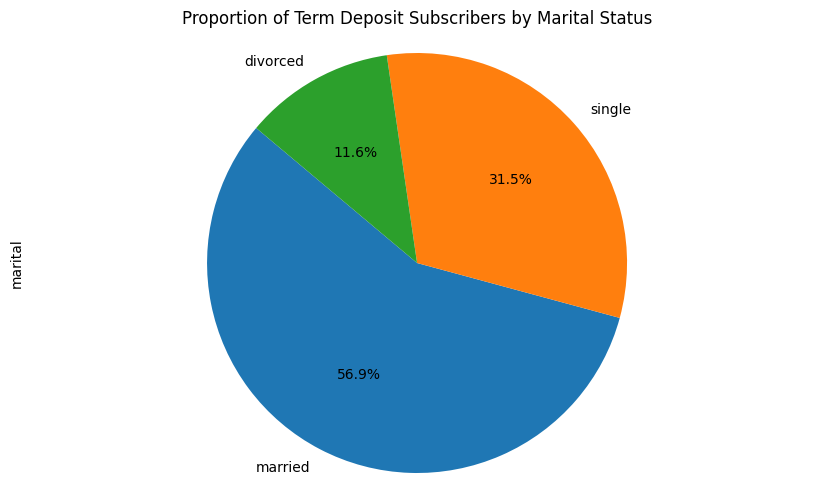

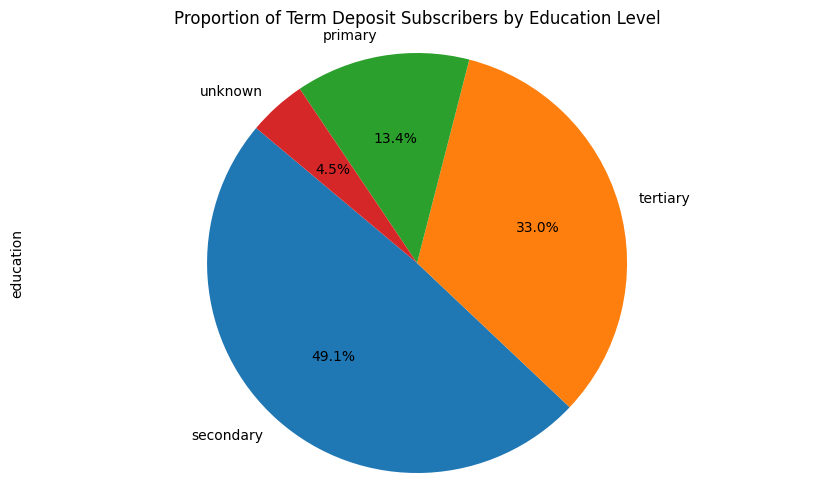

In [11]:
# Plot pie chart for marital status
plt.figure(figsize=(10, 6))
plt.title('Proportion of Term Deposit Subscribers by Marital Status')
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# Plot pie chart for education level
plt.figure(figsize=(10, 6))
plt.title('Proportion of Term Deposit Subscribers by Education Level')
df['education'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

*insight: This visualization helps understand that the married and those in secondary institutions subscribed the most to term deposits.*

**The distributions for clients who subscribed to term deposits and those who did not Subscribe**

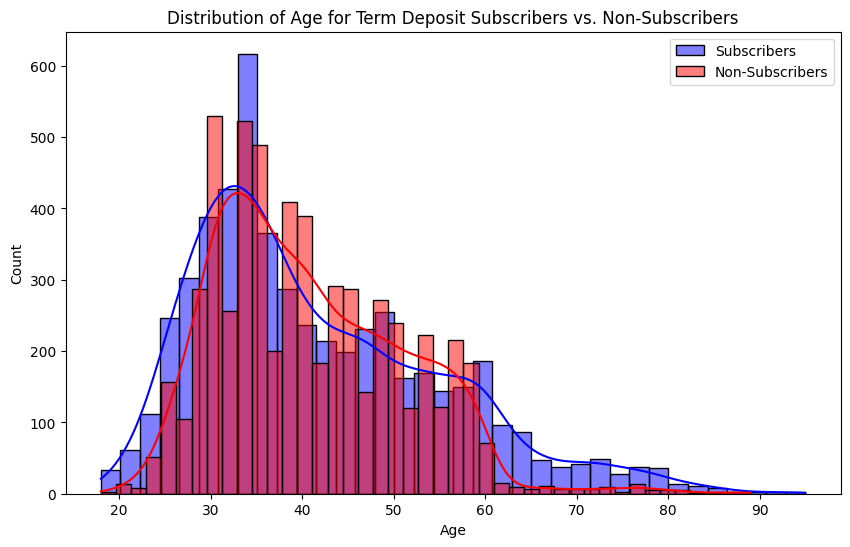

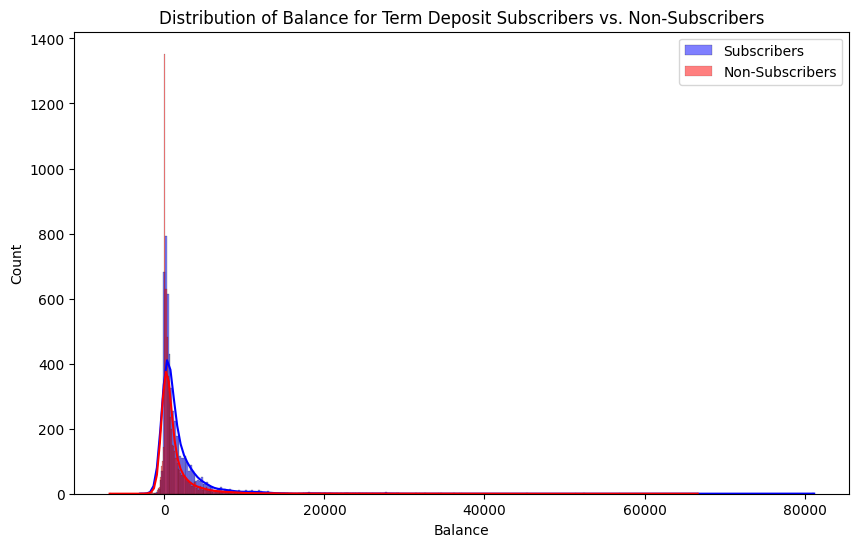

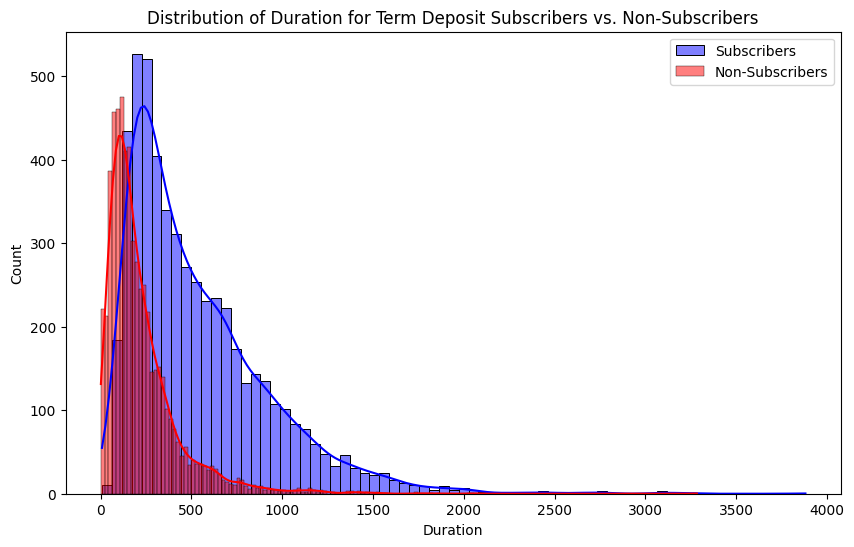

In [12]:
# Filter data for subscribers and non-subscribers
subscribers = df[df['deposit'] == 'yes']
non_subscribers = df[df['deposit'] == 'no']

# Plot histograms for age
plt.figure(figsize=(10, 6))
plt.title('Distribution of Age for Term Deposit Subscribers vs. Non-Subscribers')
sns.histplot(subscribers['age'], color='blue', label='Subscribers', kde=True)
sns.histplot(non_subscribers['age'], color='red', label='Non-Subscribers', kde=True)
plt.xlabel('Age')
plt.legend()
plt.show()

# Plot histograms for balance
plt.figure(figsize=(10, 6))
plt.title('Distribution of Balance for Term Deposit Subscribers vs. Non-Subscribers')
sns.histplot(subscribers['balance'], color='blue', label='Subscribers', kde=True)
sns.histplot(non_subscribers['balance'], color='red', label='Non-Subscribers', kde=True)
plt.xlabel('Balance')
plt.legend()
plt.show()

# Plot histograms for duration
plt.figure(figsize=(10, 6))
plt.title('Distribution of Duration for Term Deposit Subscribers vs. Non-Subscribers')
sns.histplot(subscribers['duration'], color='blue', label='Subscribers', kde=True)
sns.histplot(non_subscribers['duration'], color='red', label='Non-Subscribers', kde=True)
plt.xlabel('Duration')
plt.legend()
plt.show()

The histograms shows the distribution of client's over age, account balance and duration for term deposit and there is no difference between the age distributiom for subscribers and non subscribers although genrally we have more subscribers

**Identifying potential outliers and comparing the distribution between subscribers and non-subscribers**

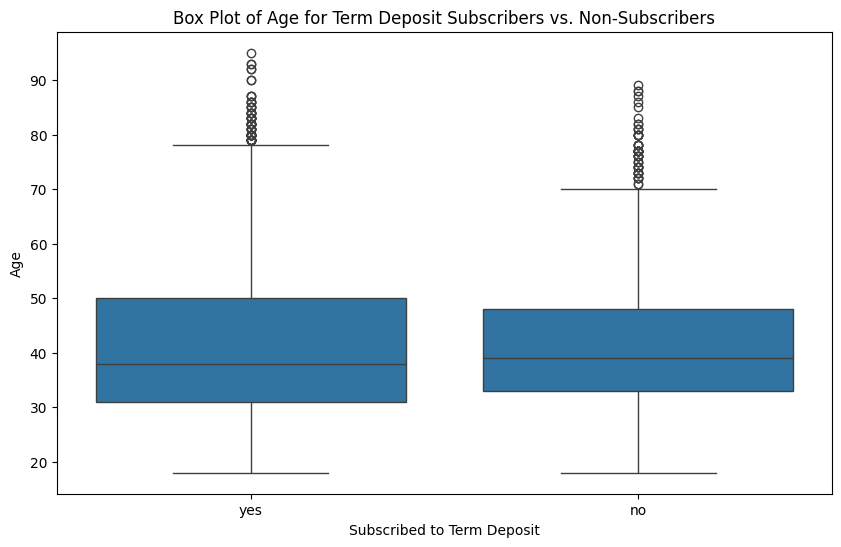

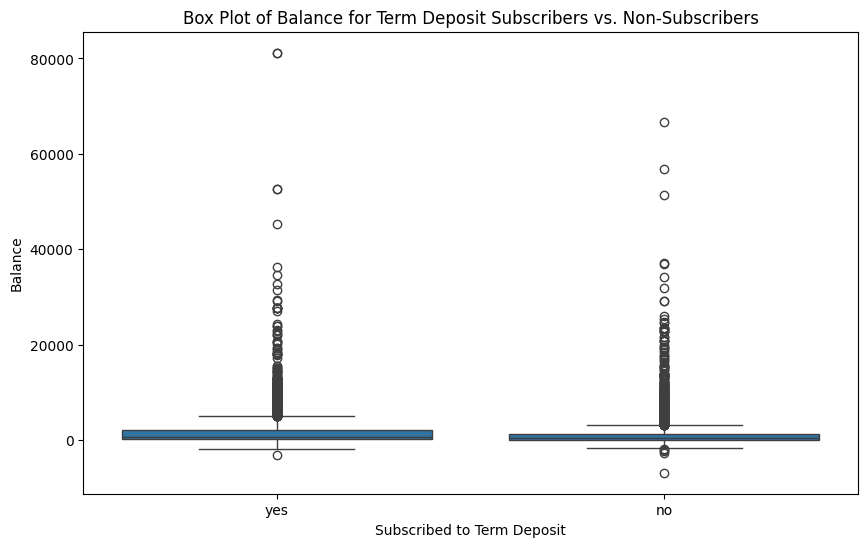

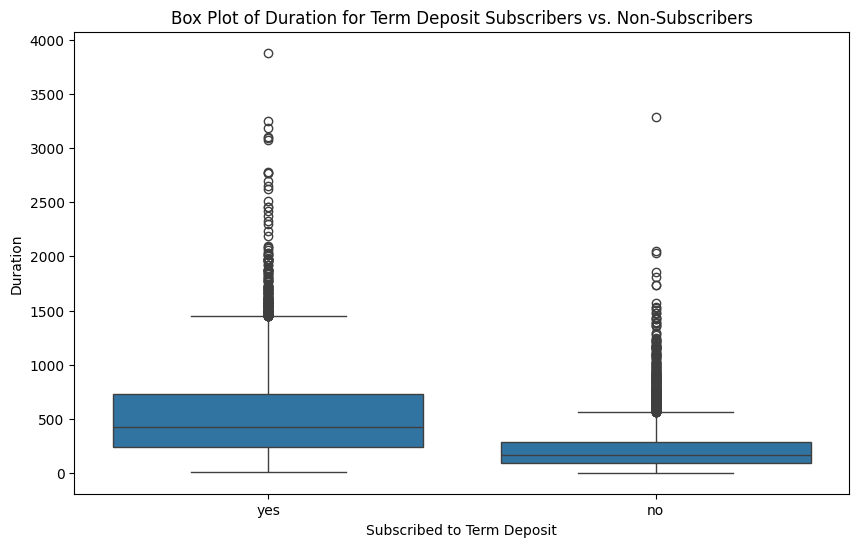

In [13]:
# Filter data for subscribers and non-subscribers
subscribers = df[df['deposit'] == 'yes']
non_subscribers = df[df['deposit'] == 'no']

# Select numerical features for comparison
numerical_features = ['age', 'balance', 'duration']

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    plt.title(f'Box Plot of {feature.capitalize()} for Term Deposit Subscribers vs. Non-Subscribers')
    sns.boxplot(x='deposit', y=feature, data=df)
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel(feature.capitalize())
    plt.show()

*Insights:
We can identify differences in the median, quartiles, and presence of outliers between the two groups.*

**Trends over time, such as the number of contacts made per day/month or the success rate of campaigns over time.**

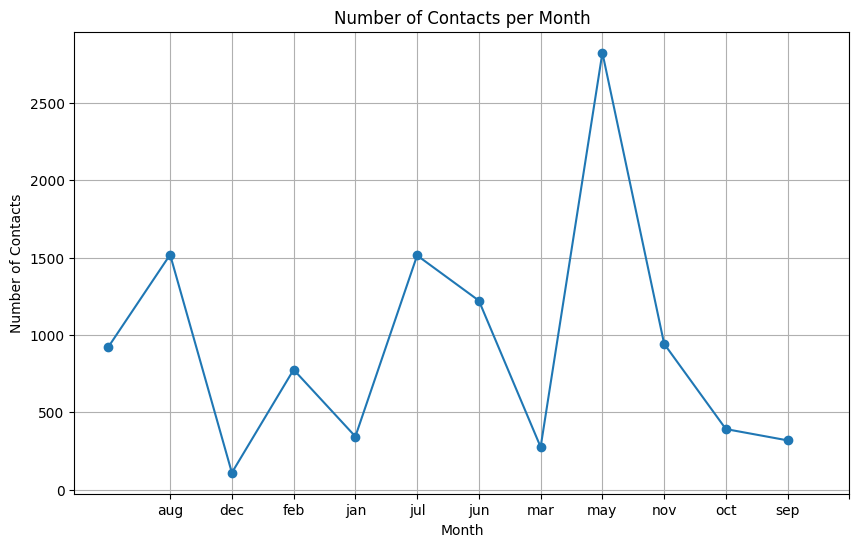

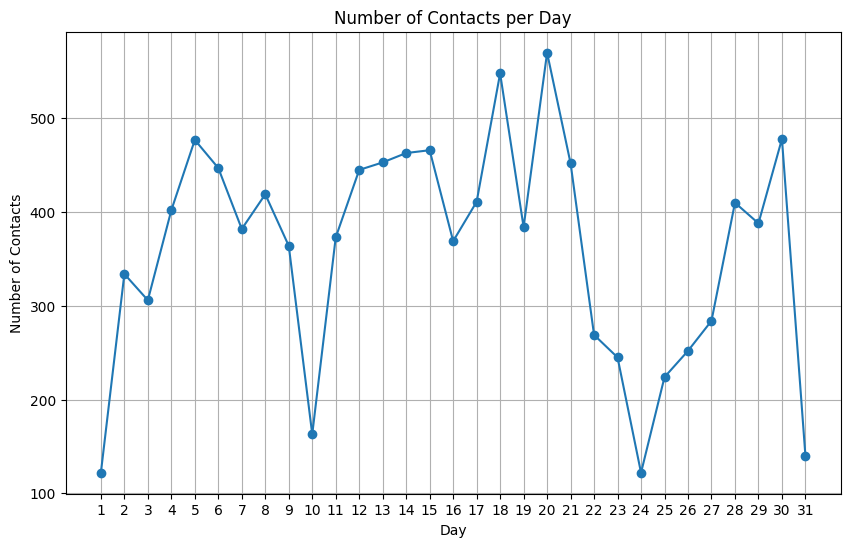

In [14]:
# Group data by month and count number of contacts
contacts_per_month = df.groupby('month').size()

# Group data by day and count number of contacts
contacts_per_day = df.groupby('day').size()

# Plot line graph for number of contacts per month
plt.figure(figsize=(10, 6))
plt.plot(contacts_per_month.index, contacts_per_month.values, marker='o')
plt.title('Number of Contacts per Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Plot line graph for number of contacts per day
plt.figure(figsize=(10, 6))
plt.plot(contacts_per_day.index, contacts_per_day.values, marker='o')
plt.title('Number of Contacts per Day')
plt.xlabel('Day')
plt.ylabel('Number of Contacts')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()

*Insight:
This plot shows the trend in the number of contacts made per month and day of the week over time.
It helps in identifying any seasonal patterns or trends in contact activity throughout the year which show that highest contact was made in the month of May and middle of the month *

** Exploring the relationship between numerical features and the target variable (term deposit subscription status)**

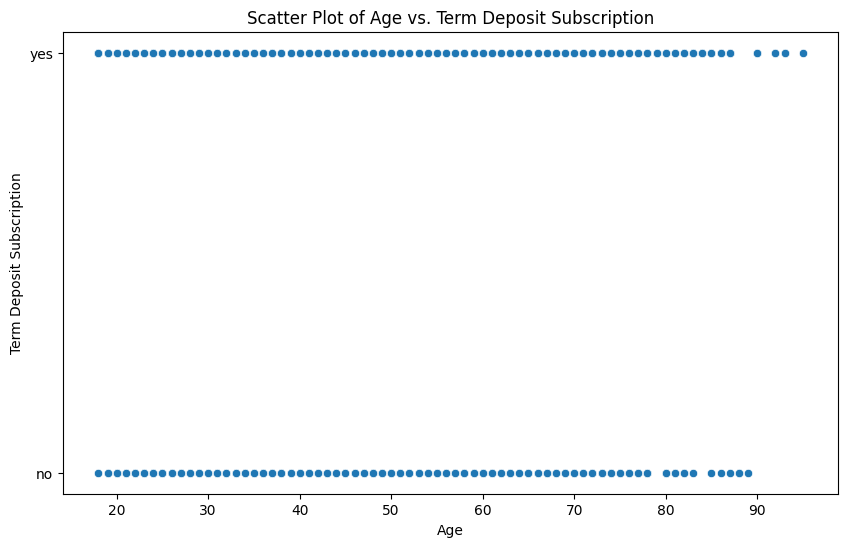

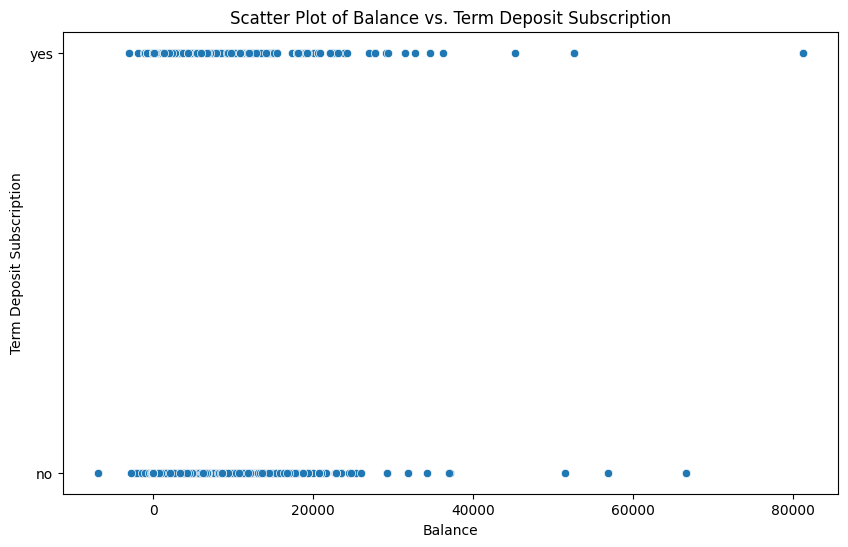

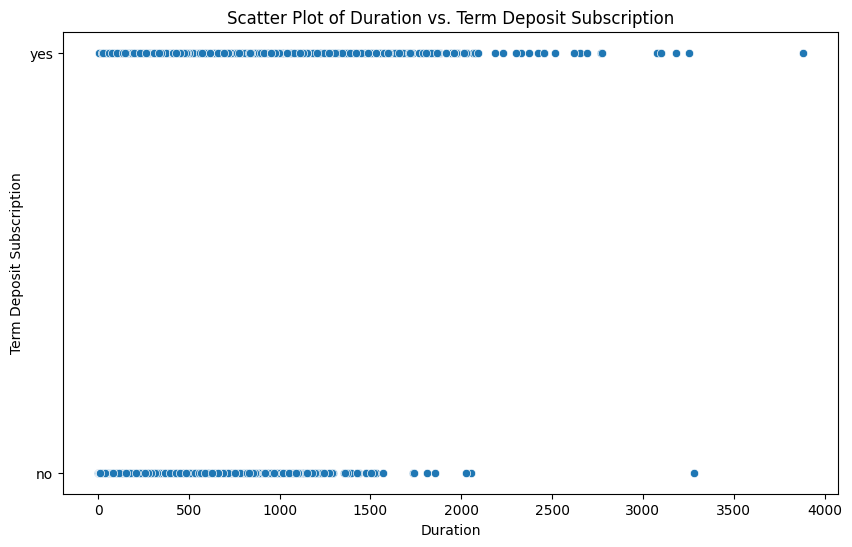

In [16]:
# Assuming 'df' is your DataFrame
df['deposit_numeric'] = df['deposit'].map({'no': 0, 'yes': 1})

# Select numerical features for scatter plot
numerical_features = ['age', 'balance', 'duration']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='deposit', data=df)
    plt.title(f'Scatter Plot of {feature.capitalize()} vs. Term Deposit Subscription')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Term Deposit Subscription')
    plt.show()

*Insight:
This scatter plot visualizes the relationship between client age and term deposit subscription status.
It identifies a trend in subscription behavior based on age, with older clients subscribing, clients with higher account balances are inclined to subscribe to term deposits and longer contact durations lead to higher chances of term deposit subscription.*

**The success rate of marketing campaigns across different categories**

<Figure size 1000x600 with 0 Axes>

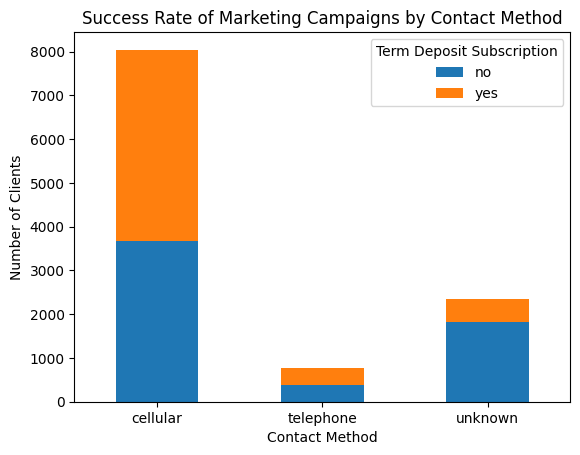

<Figure size 1000x600 with 0 Axes>

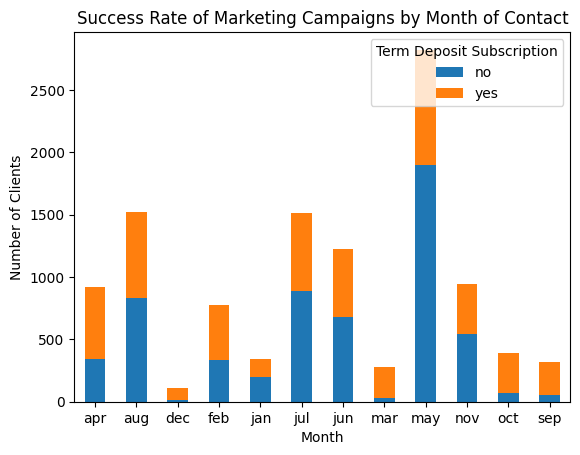

In [17]:
# Group data by contact method and term deposit subscription status
contact_method_subscriptions = df.groupby(['contact', 'deposit']).size().unstack()

# Plot stacked bar chart for success rate of marketing campaigns by contact method
plt.figure(figsize=(10, 6))
contact_method_subscriptions.plot(kind='bar', stacked=True)
plt.title('Success Rate of Marketing Campaigns by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.legend(title='Term Deposit Subscription', loc='upper right')
plt.show()

# Group data by month of contact and term deposit subscription status
month_subscriptions = df.groupby(['month', 'deposit']).size().unstack()

# Plot stacked bar chart for success rate of marketing campaigns by month of contact
plt.figure(figsize=(10, 6))
month_subscriptions.plot(kind='bar', stacked=True)
plt.title('Success Rate of Marketing Campaigns by Month of Contact')
plt.xlabel('Month')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.legend(title='Term Deposit Subscription', loc='upper right')
plt.show()

*Insight:
The Marketing Campaigns has its highest impact with the clients reached through Cellular and in the Month of May having both the highest subcribers and non subscribers*

**The correlation between numerical features and the target variable (term deposit subscriptions) **

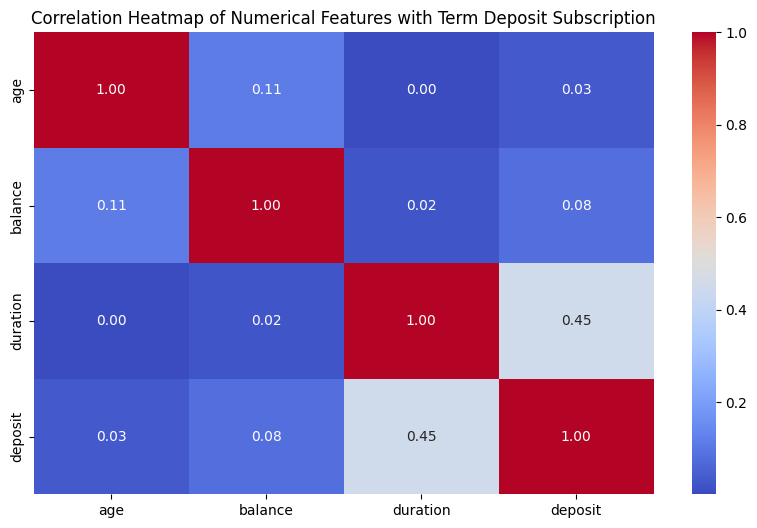

In [18]:
# Convert target variable to numerical (0: No, 1: Yes)
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

# Select numerical features for correlation heatmap
numerical_features = ['age', 'balance', 'duration']

# Calculate correlation matrix
correlation_matrix = df[numerical_features + ['deposit']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features with Term Deposit Subscription')
plt.show()

*Insight:
The correlation heatmap visualizes the correlation coefficients between numerical features and the target variable (term deposit subscriptions).This visualization helps identify features that may have a significant impact on term deposit subscriptions and can be used for feature selection in predictive modeling.*

The distribution of numerical features for term deposit subscribers and non-subscribers

<ipython-input-19-0c3e0000b3dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y=feature, data=df, palette='muted')
<ipython-input-19-0c3e0000b3dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y=feature, data=df, palette='muted')
<ipython-input-19-0c3e0000b3dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='default', y=feature, data=df, palette='muted')


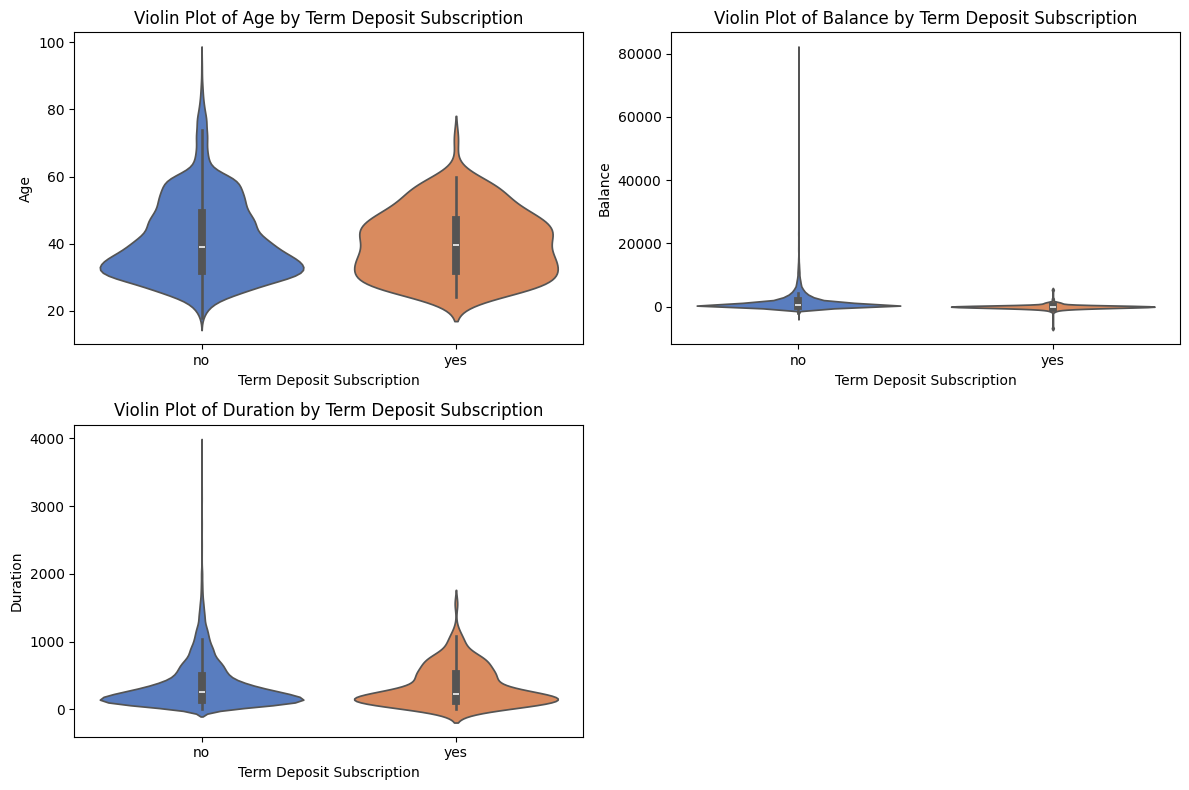

In [19]:
# Select numerical features for violin plots
numerical_features = ['age', 'balance', 'duration']

# Create violin plots
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='default', y=feature, data=df, palette='muted')
    plt.title(f'Violin Plot of {feature.capitalize()} by Term Deposit Subscription')
    plt.xlabel('Term Deposit Subscription')
    plt.ylabel(feature.capitalize())
plt.tight_layout()
plt.show()

*Insight:
Violin plots help visualize the distribution of numerical features for term deposit subscribers and non-subscribers separately, allowing for comparison of their distributions and identifying any differences or patterns.*

# **Machine Learning Model:**

Prepare Dataset for Model

In [20]:
# convert deposit column to numerical values
deposit_feature = pd.get_dummies(df['deposit'], drop_first=True)

In [21]:
#add new column to dstaser
df['deposit_feature'] = deposit_feature

In [22]:
# convert deposit column to numerical values
loan_feature = pd.get_dummies(df['loan'], drop_first=True)

In [23]:
#add new column to dstaser
df['loan_feature'] = loan_feature

In [24]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit', 'deposit_numeric', 'deposit_feature',
       'loan_feature'],
      dtype='object')

In [25]:
#drop the columns which are not required
df.drop(['deposit', 'marital', 'job', 'education', 'housing', 'contact', 'day', 'month', 'pdays', 'poutcome', 'default', 'campaign', 'loan'], axis=1, inplace=True)

In [26]:
df.head()

,age,balance,duration,previous,deposit_numeric,deposit_feature,loan_feature
0,59,2343,1042,0,1,1,0
1,56,45,1467,0,1,1,0
2,41,1270,1389,0,1,1,0
3,55,2476,579,0,1,1,0
4,54,184,673,0,1,1,0


In [27]:
# separate dependent from independent variables
X = df[['age', 'balance', 'duration']]
y = df['deposit_feature']

**Data Modelling**

Building Model Using logistic Regression

In [28]:
# import train test split method
from sklearn.model_selection import train_test_split

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# import logistic Regression
from sklearn.linear_model import LogisticRegression

In [31]:
# fit logistic regression
lr= LogisticRegression()
lr.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [32]:
# Predict
predict = lr.predict(X_test)

**Testing**

See how the moeel is performing

In [33]:
#primt confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, predict)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, predict))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predict))

Accuracy: 0.7174205105239588

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1166
           1       0.76      0.60      0.67      1067

    accuracy                           0.72      2233
   macro avg       0.72      0.71      0.71      2233
weighted avg       0.72      0.72      0.71      2233


Confusion Matrix:
[[959 207]
 [424 643]]


**visualize the Logistic Regression Model:**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 3 features as input.

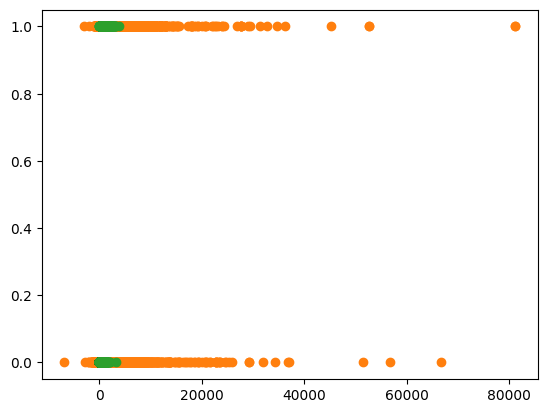

In [52]:
feature_name = ['age', 'balance', 'duration']

# Scatter plot for each feature
for feature in feature_name:
    plt.scatter(df[feature], df['deposit_feature'])

# Logistic Regression line
plt.plot(np.linspace(2, 15, 100).reshape(-1, 1),
         lr.predict_proba(np.linspace(2, 15, 100).reshape(-1, 1))[:, 1],
         color="black", linewidth=2)

plt.xlabel("Feature Values")
plt.ylabel("Target Variable")
plt.title("Logistic Regression - Bank Marketing Dataset")
plt.legend(['Logistic Regression', *feature_name)  # Adding legend for clarity
plt.show()

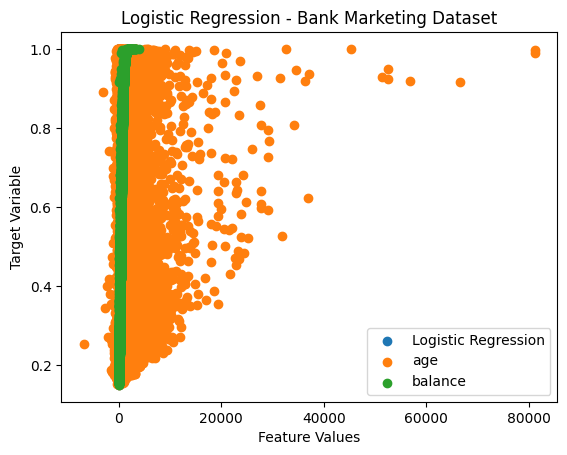

In [40]:
# Scatter plot for each feature (modified loop)
for feature in feature_name:
    predicted_proba = lr.predict_proba(df[['age', 'balance', 'duration']])[:, 1]
    plt.scatter(df[feature], predicted_proba)

plt.xlabel("Feature Values")
plt.ylabel("Target Variable")
plt.title("Logistic Regression - Bank Marketing Dataset")
plt.legend(['Logistic Regression', *feature_name])  # Adding legend for clarity
plt.show()

**Building Model Using SVM Modelling**

In [41]:
#import library
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(random_state=42)

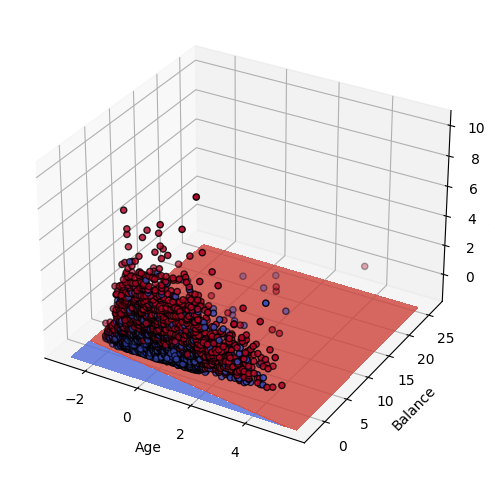

In [43]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Function to plot 3D decision boundary
def plot_3d_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
    Z = Z.reshape(xx.shape)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    ax.contourf(xx, yy, Z, zdir='z', offset=np.min(X[:, 2]) - 1, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.set_xlabel('Age')
    ax.set_ylabel('Balance')
    ax.set_zlabel('Duration')

    plt.show()

# Plot 3D decision boundary
plot_3d_decision_boundary(X_train_scaled, y_train, svm_model)

**Building Model Using Random Forest Modelling **

In [44]:

# import library
from sklearn.ensemble import RandomForestClassifier

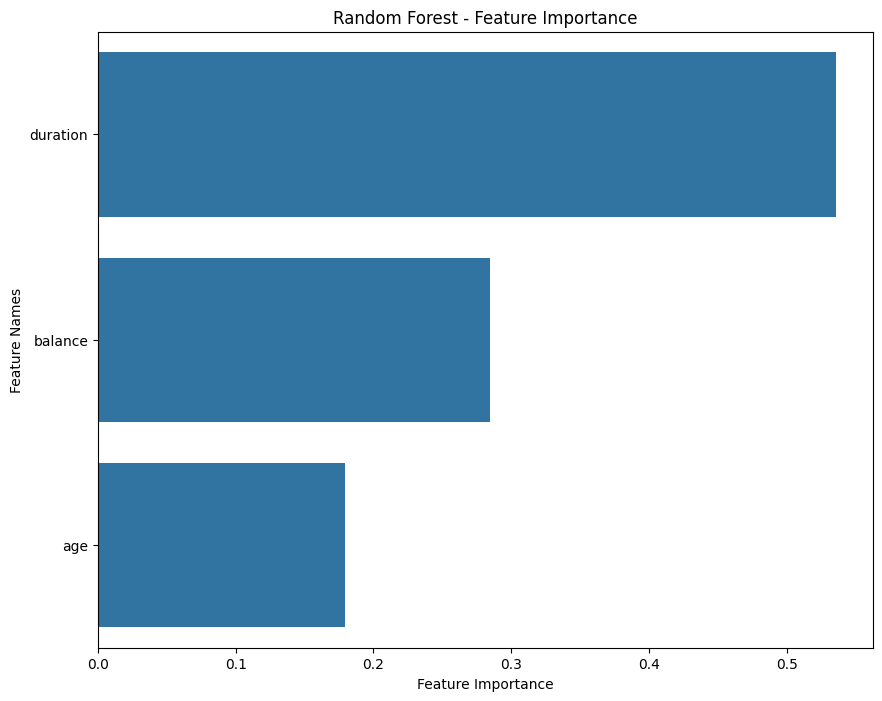

In [45]:
# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Function to plot feature importance
def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' - Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

# Plot feature importance for Random Forest
plot_feature_importance(rf_model.feature_importances_, X.columns, 'Random Forest')
plt.show()